# Visualisation of 30 second Trip segmens

In this notebook the 30 second trip segments are visualized via TSNE.

**Note:** Here we did not calculate any distance measure. Only the euclidean norm of the x,y,z accelerometer sensor was computed. 

In [64]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
#Visualisation Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

%aimport visualization.visualize
from visualization.visualize import get_color_encoding


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
file_path = os.path.join(os.path.abspath(DatasetDownloader.get_data_dir()),"preprocessed","preprocessed_data.csv")

trip_segments = pd.read_csv(file_path, sep=";")

In [26]:
trips_only = trip_segments.drop(["mode","notes","scripted","token"],axis=1)
trips_only.head(5)

,snippet_0,snippet_1,snippet_2,snippet_3,snippet_4,snippet_5,snippet_6,snippet_7,snippet_8,snippet_9,...,snippet_590,snippet_591,snippet_592,snippet_593,snippet_594,snippet_595,snippet_596,snippet_597,snippet_598,snippet_599
0,9.581208,9.960991,9.785252,9.872768,9.870140,10.166163,10.056292,10.004487,9.659133,9.935964,...,13.165458,10.114440,10.898431,10.214158,10.044938,10.034166,8.602515,9.384637,9.514746,9.288077
1,10.337637,12.838034,15.364792,15.324666,12.769030,13.635448,13.861526,10.694924,9.372912,6.684568,...,8.056938,8.043749,11.350581,13.258719,14.660510,16.337576,11.316479,18.977516,13.708758,12.262801
2,6.221869,5.691998,3.720554,13.201452,25.787305,12.819663,12.274784,10.432849,14.999284,10.232603,...,18.127154,12.405962,10.976896,4.702965,5.018144,3.308320,26.764418,14.596102,13.549618,12.152647
3,11.164356,14.362519,8.734719,8.261912,8.712456,8.137594,12.036612,13.763066,14.402211,14.972130,...,2.785345,17.248010,19.079080,12.829641,12.533720,8.471120,14.975984,9.453351,8.574546,8.692198
4,7.639875,11.052787,13.701992,14.693770,16.618953,10.832624,18.093698,13.731357,10.302934,6.224486,...,15.984588,13.715505,17.667007,13.380566,10.451611,4.464554,4.606670,2.433017,29.036828,14.390928


## Visualise trip segments with TSNE
We can see from the plots that without calculating the distance metrics, we can see no real structure in the data set

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
trips_reduced = pd.DataFrame(pca.fit_transform(trips_only))

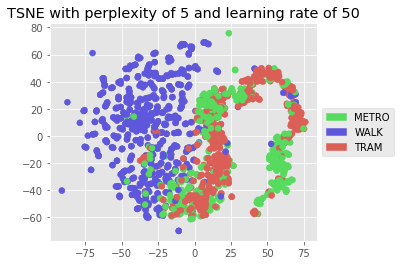

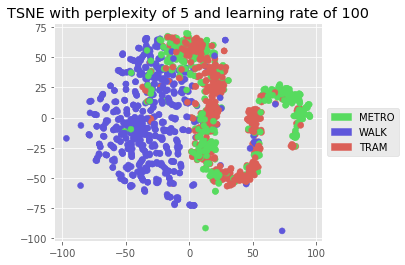

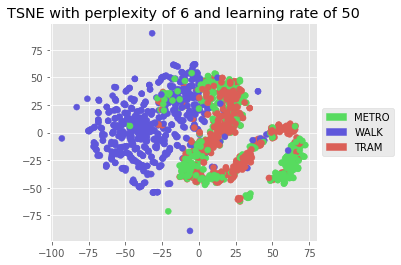

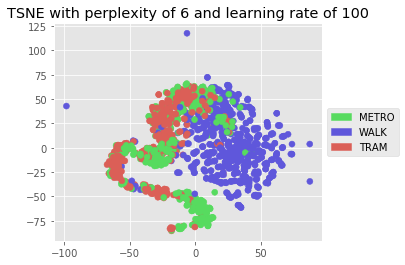

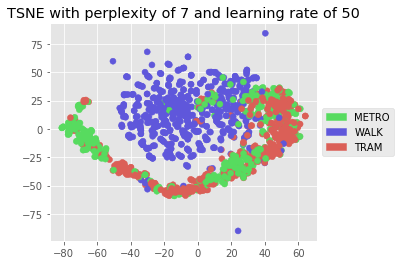

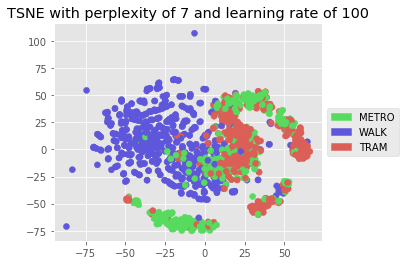

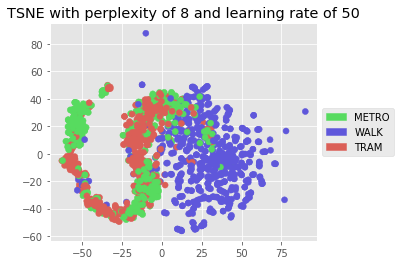

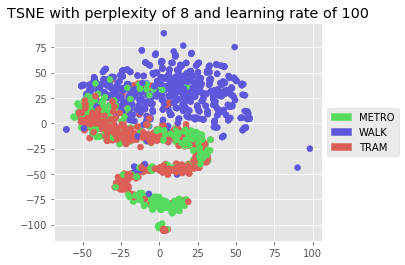

In [92]:
from sklearn.manifold import TSNE

learning_rate = [50, 100]
for perplexity_i in range(5,9):
    for learning_rate_i in learning_rate:
        fig,ax = plt.subplots()
        colors, color_patches = get_color_encoding(trip_segments["mode"])
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        # Put a legend to the right of the current axis
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                  handles=color_patches)
        tsne = TSNE(learning_rate=learning_rate_i, perplexity=perplexity_i).fit_transform(trips_reduced)
        ax.set_title("TSNE with perplexity of {} and learning rate of {}".format(perplexity_i,learning_rate_i))
        ax.scatter(tsne[:, 0], tsne[:, 1], c=colors)
plt.show();